In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
import natsort
import GrowthAssayPlotlib

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
ga1_file = 'GA1 parasitemia.xlsx'
column_title_row = 3
OUTPUT_FOLDER = ''

df1 = GrowthAssayPlotlib.load_file(ga1_file, column_title_row)
df1_melted_replicas = GrowthAssayPlotlib.melt_df(df1, id_vars=['Plate number', 'Well position', 'Line', 'Clone', 'Strain', 'Speed'])

df1_melted_replicas.head()


Loading GA1 parasitemia.xlsx
['Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17']
Repeat 1 = Day 3 / Day 2, Parasitemia 1 = Day 2
Repeat 2 = Day 5 / Day 4, Parasitemia 2 = Day 4
Repeat 3 = Day 7 / Day 6, Parasitemia 3 = Day 6
Repeat 4 = Day 9 / Day 8, Parasitemia 4 = Day 8
Repeat 5 = Day 11 / Day 10, Parasitemia 5 = Day 10
Repeat 6 = Day 13 / Day 12, Parasitemia 6 = Day 12
Repeat 7 = Day 15 / Day 14, Parasitemia 7 = Day 14
Repeat 8 = Day 17 / Day 16, Parasitemia 8 = Day 16


,Plate number,Well position,Line,Clone,Strain,Speed,Repeat,Invasion rate,Parasitemia
0,3,A3,KORH4 C1,C1,KORH4,Static,Repeat 1,5.203166,0.379
1,5,A5,KOEBA181 C1,C1,KOEBA181,Static,Repeat 1,4.396789,0.436
2,6,A6,KOEBA175 C6,C6,KOEBA175,Static,Repeat 1,10.128814,0.295
3,9,A9,KORH2a C3,C3,KORH2a,Static,Repeat 1,9.524862,0.181
4,10,A10,KORH1 C1,C1,KORH1,Static,Repeat 1,3.373134,0.067


In [24]:
# plot all 
MAX_INVASION_RATE_PLOT = 10
output_folder_ga1 = GrowthAssayPlotlib.get_output_folder('GA1', OUTPUT_FOLDER)

df1_melted_replicas_filtered = GrowthAssayPlotlib.filter_dataframe(
    df=df1_melted_replicas,
    ignore_repeats=[
        # 'Repeat 1',
    ],
    filter_list_filename='GA1 filtered',
)

# group replicas per repeat
df1_melted = GrowthAssayPlotlib.group_repeats(
    df_melted_replicas_filtered = df1_melted_replicas_filtered,
    group_keys=['Line', 'Speed', 'Repeat', 'Strain', 'Clone'],
)

df1_melted.to_json('GA1_df_melted.json')

# GrowthAssayPlotlib.plot_repeats_for_line(df1_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga1)
# GrowthAssayPlotlib.plot_repeats_for_wells(df1_melted_replicas_filtered, MAX_INVASION_RATE_PLOT, output_folder_ga1)
# GrowthAssayPlotlib.plot_parasimetia_vs_invasion_rate(df1_melted_replicas, ['Line', 'Speed'], output_folder=output_folder_ga1)
# for label, df_plot in [('with replicas', df1_melted_replicas), ('averaged replicas', df1_melted)]:
#     GrowthAssayPlotlib.plot_line(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga1)
#     GrowthAssayPlotlib.plot_speed(df_plot, label, MAX_INVASION_RATE_PLOT, output_folder_ga1)

(8, "C6"),
(12, "A5"),
(12, "A10"),
(12, "B8"),
(12, "C2"),
(12, "C4"),
(12, "C5"),
(12, "C6"),
(12, "D3"),
(12, "D4"),
(14, "B2"),
(14, "D8"),
(16, "A3"),
(16, "A5"),
(16, "A9"),
(16, "B2"),
(16, "B3"),
(16, "B6"),
(16, "B8"),
(16, "C1"),
(16, "C4"),
(16, "C5"),
(16, "C6"),
(16, "C9"),
(16, "C11"),
(16, "D4"),
(16, "D8"),


In [25]:
df1_melted_replicas_filtered

,Plate number,Well position,Line,Clone,Strain,Speed,Repeat,Invasion rate,Parasitemia
0,3,A3,KORH4 C1,C1,KORH4,Static,Repeat 1,5.203166,0.379
1,5,A5,KOEBA181 C1,C1,KOEBA181,Static,Repeat 1,4.396789,0.436
2,6,A6,KOEBA175 C6,C6,KOEBA175,Static,Repeat 1,10.128814,0.295
3,9,A9,KORH2a C3,C3,KORH2a,Static,Repeat 1,9.524862,0.181
4,10,A10,KORH1 C1,C1,KORH1,Static,Repeat 1,3.373134,0.067
...,...,...,...,...,...,...,...,...,...
217,36,C12,KOEBA175 C6,C6,KOEBA175,Static,Repeat 8,11.118541,0.329
218,39,D3,KORH2a C3,C3,KORH2a,Static,Repeat 8,2.525100,0.996
220,41,D5,KOPfs25 C1,C1,KOPfs25,Static,Repeat 8,4.749574,0.587
221,42,D6,KOEBA140 C4,C4,KOEBA140,Static,Repeat 8,5.676647,0.668


Static


Static
Static


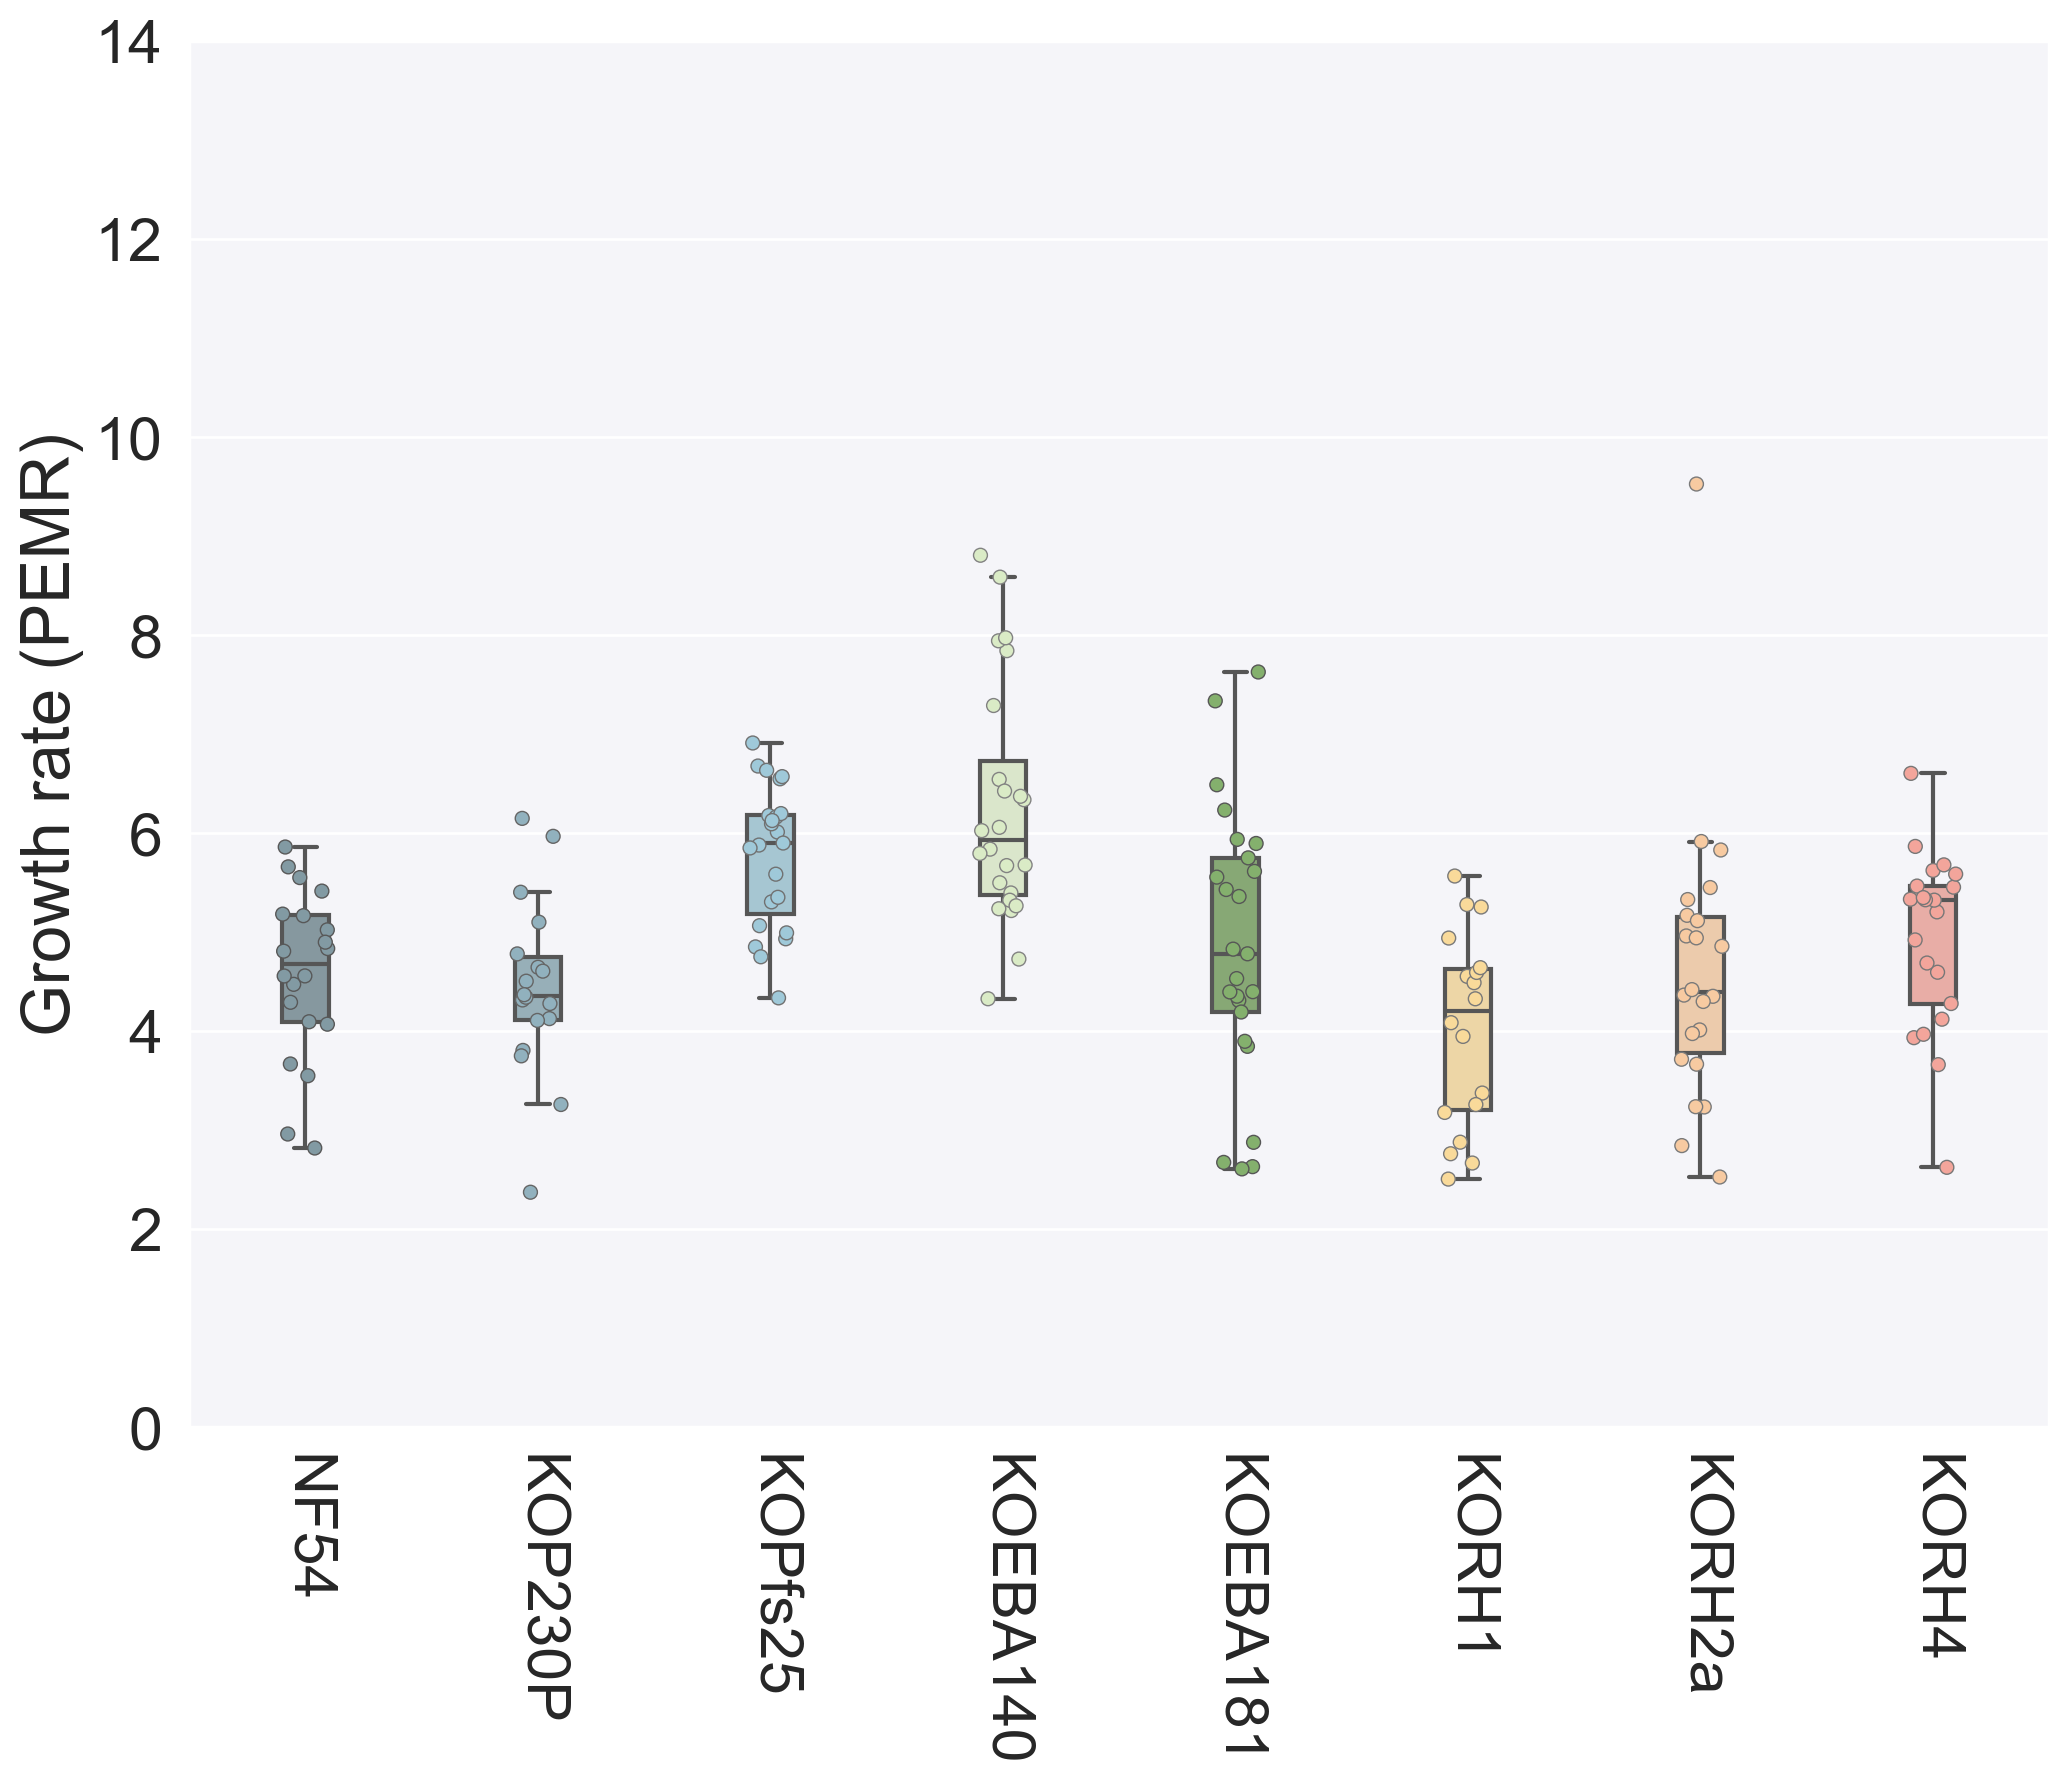

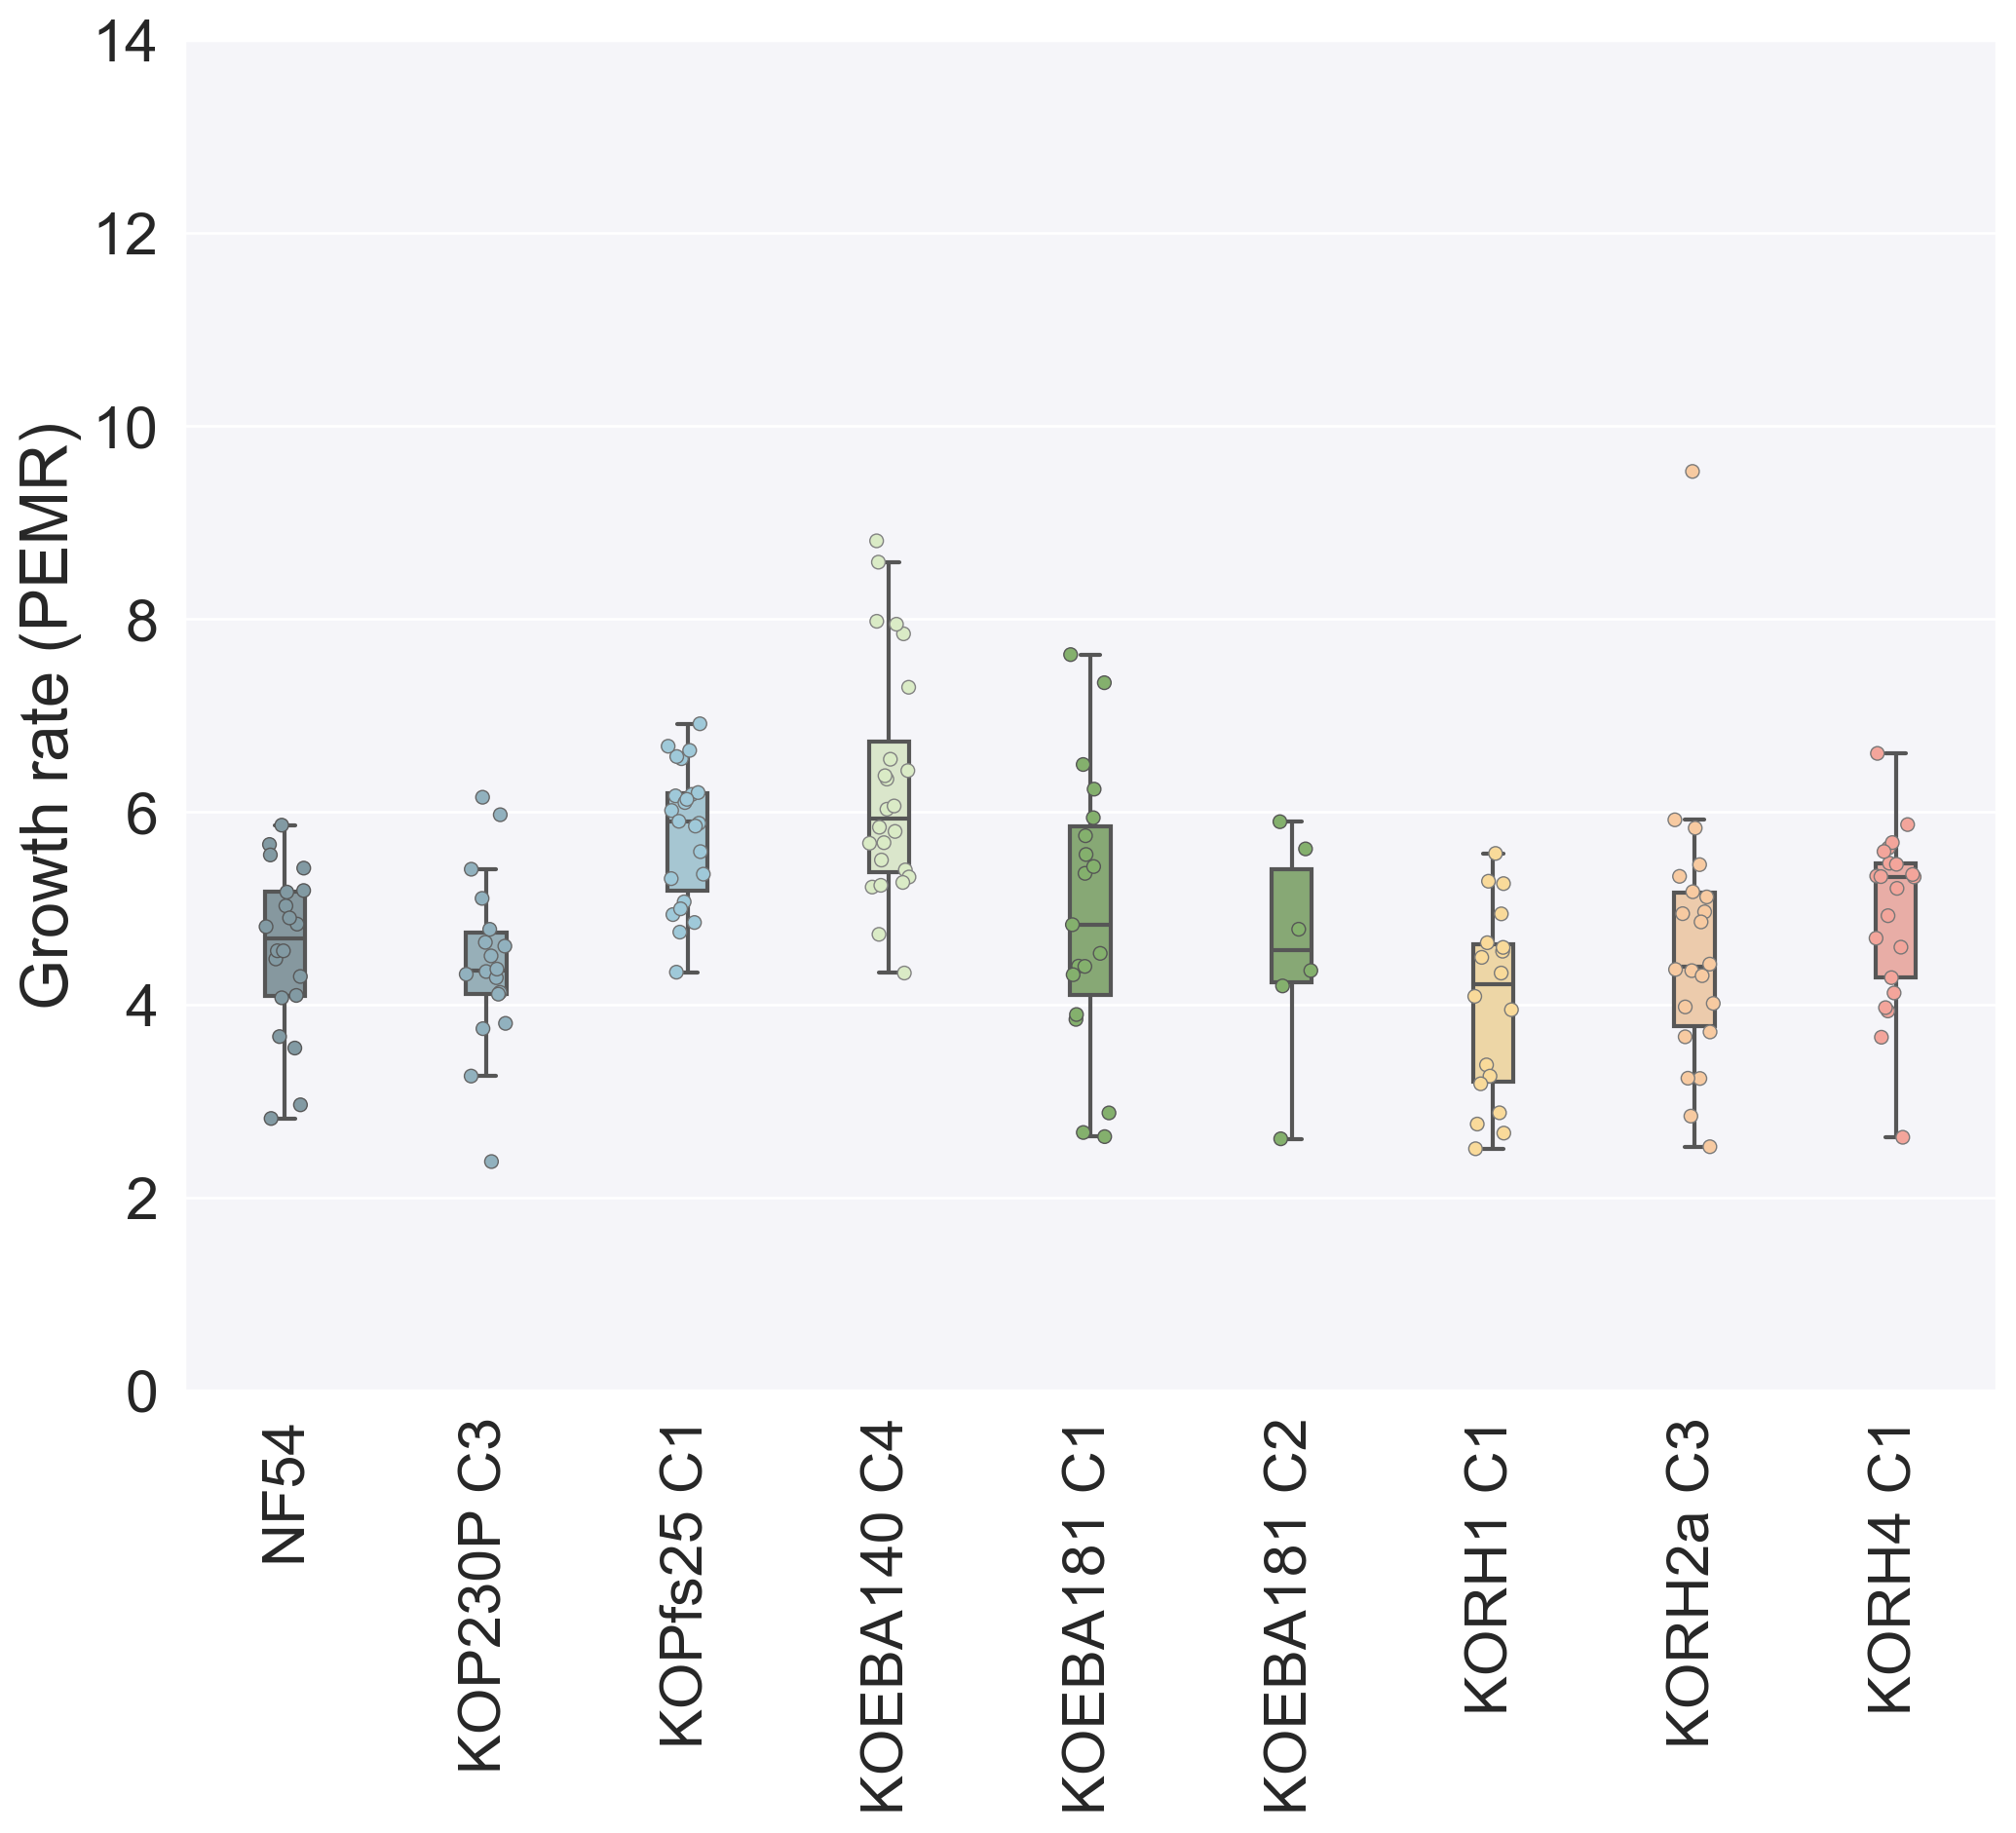

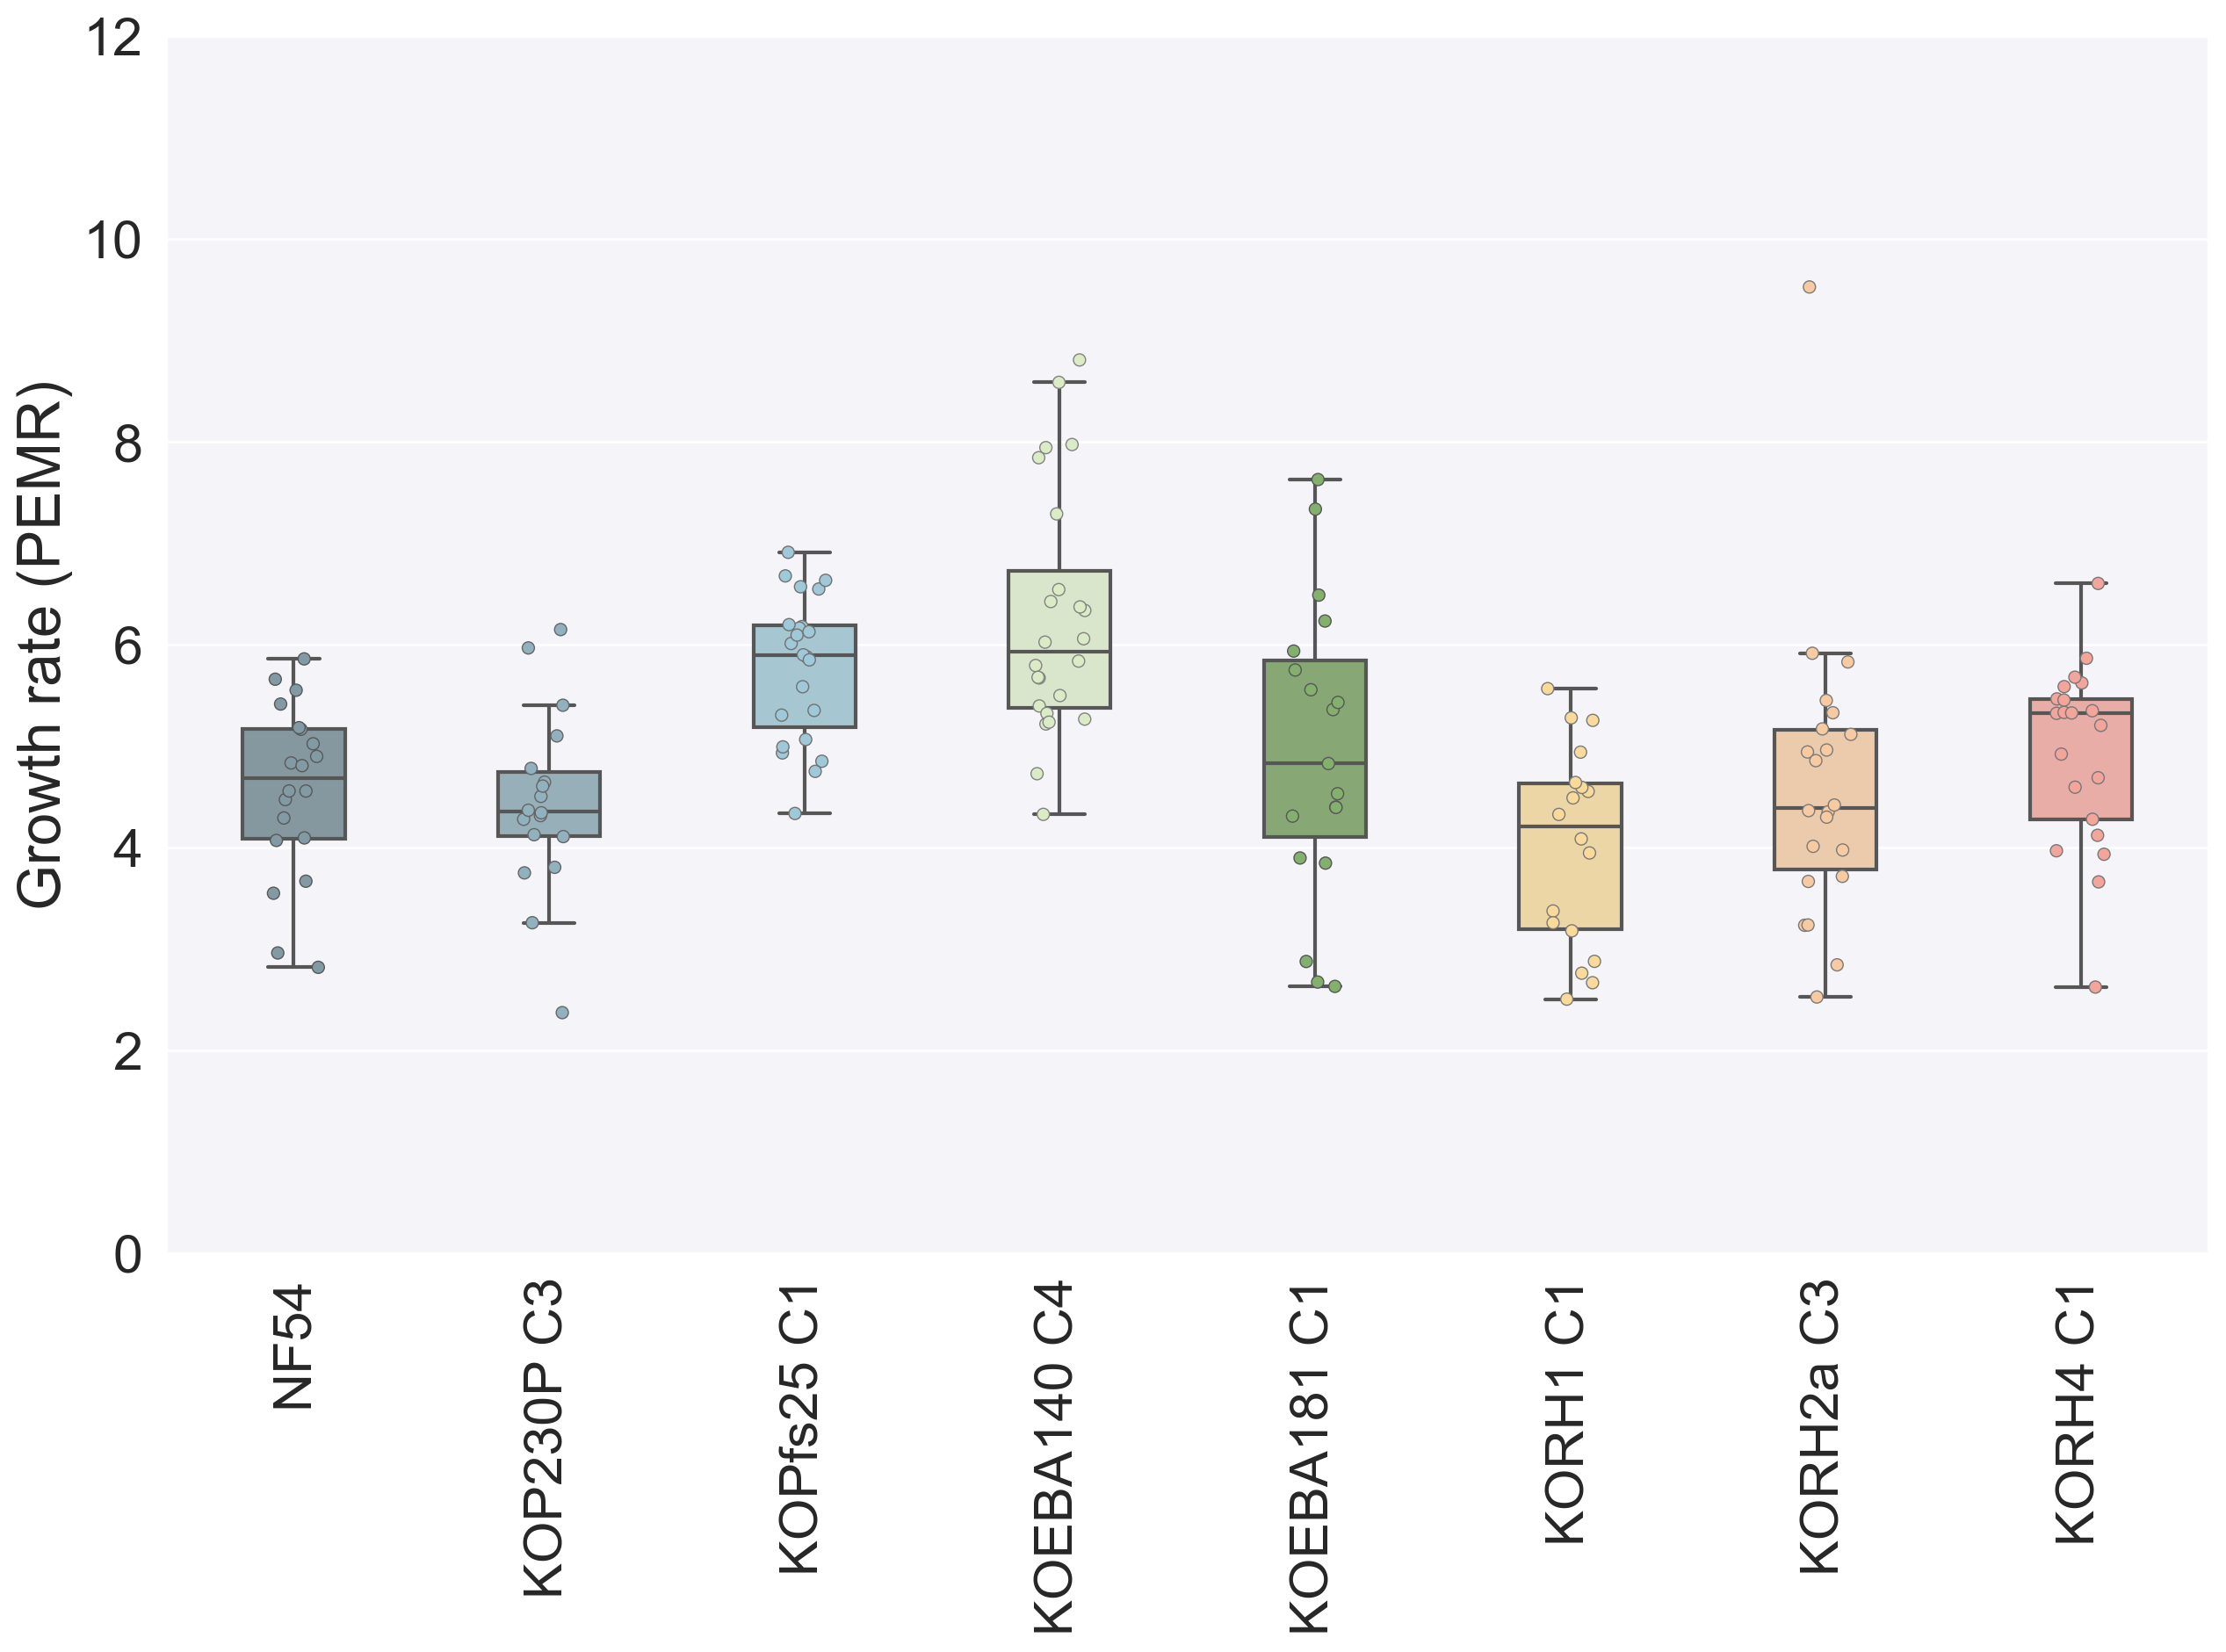

In [26]:

remove_lines = ['KOEBA175', 'Barseq']
df1_melted_q = df1_melted_replicas_filtered.query('Strain != @remove_lines')



GrowthAssayPlotlib.plot_pretty_barplot(
    df=df1_melted_q,
    plot_clones=False, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
)
GrowthAssayPlotlib.plot_pretty_barplot(
    df=df1_melted_q,
    plot_clones=True, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
)

plt.xticks(rotation=90)

clone_list = [
    'NF54',
    'KOEBA181 C1',
    'KORH4 C1',
    'KOEBA140 C4', 
    'KOEBA175 C6',
    'KORH2a C3',
    'KORH1 C1',
    'KOPfs25 C1',
    'KOP230P C3',
]
dfq = df1_melted_q.query('Line == @clone_list')
GrowthAssayPlotlib.plot_pretty_barplot(
    df=dfq,
    plot_clones=True, # or 'Line' if you want clones to show separatley
    output_folder=output_folder_ga1,
    bar_width=0.4,
)

plt.gcf().set_size_inches(15,9)
plt.xticks(rotation=90)
plt.ylim((0,12))

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(f'Graphs GA1/clones_separate_fig5.svg', bbox_inches='tight')


In [27]:
GrowthAssayPlotlib.significance_testing(
    df=df1_melted, 
    group_keys=['Line', 'Speed'],
    wildtype='KOPfs25 C1'
)


Testing Line for S, t, a, t, i, c.
   - KOPfs25 C1 and KOEBA140 C4 : ttest p-value = 0.2763, not
   - KOPfs25 C1 and KOEBA175 C6 : ttest p-value = 0.0000, significant
   - KOPfs25 C1 and KOEBA181 C1 : ttest p-value = 0.1031, not
   - KOPfs25 C1 and KOEBA181 C2 : ttest p-value = 0.0281, significant
   - KOPfs25 C1 and KOP230P C3  : ttest p-value = 0.0024, significant
   - KOPfs25 C1 and KORH1 C1    : ttest p-value = 0.0004, significant
   - KOPfs25 C1 and KORH2a C3   : ttest p-value = 0.0154, significant
   - KOPfs25 C1 and KORH4 C1    : ttest p-value = 0.0312, significant
   - KOPfs25 C1 and NF54        : ttest p-value = 0.0025, significant

Only one value of Speed for K, O, E, B, A, 1, 4, 0,  , C, 4
Testing Speed for K, O, E, B, A, 1, 4, 0,  , C, 4.
Only one value of Speed for K, O, E, B, A, 1, 7, 5,  , C, 6
Testing Speed for K, O, E, B, A, 1, 7, 5,  , C, 6.
Only one value of Speed for K, O, E, B, A, 1, 8, 1,  , C, 1
Testing Speed for K, O, E, B, A, 1, 8, 1,  , C, 1.
Only one value o

In [28]:
df1_melted

,Line,Speed,Repeat,Strain,Clone,Invasion rate,Parasitemia
0,KOEBA140 C4,Static,Repeat 1,KOEBA140,C4,5.415633,0.324333
1,KOEBA140 C4,Static,Repeat 2,KOEBA140,C4,5.796451,0.293667
2,KOEBA140 C4,Static,Repeat 3,KOEBA140,C4,6.342991,0.512000
3,KOEBA140 C4,Static,Repeat 4,KOEBA140,C4,6.221882,0.753667
4,KOEBA140 C4,Static,Repeat 5,KOEBA140,C4,8.443636,0.305000
...,...,...,...,...,...,...,...
69,NF54,Static,Repeat 4,NF54,,4.993338,0.614500
70,NF54,Static,Repeat 5,NF54,,4.834723,0.518667
71,NF54,Static,Repeat 6,NF54,,5.052540,0.724000
72,NF54,Static,Repeat 7,NF54,,3.147980,0.779333


In [29]:
dfp = df1_melted.groupby(['Line', 'Speed'], as_index=False).agg(
    mean=('Invasion rate', 'mean'),
    std=('Invasion rate', 'std'),
    count=('Invasion rate', 'count'),
)
dfp['ste'] = dfp['std']/np.sqrt(dfp['count'])
dfp

,Line,Speed,mean,std,count,ste
0,KOEBA140 C4,Static,6.255890,1.056628,8,0.373574
1,KOEBA175 C6,Static,10.526585,1.473602,8,0.520997
2,KOEBA181 C1,Static,4.851020,1.340526,7,0.506671
3,KOEBA181 C2,Static,4.572708,1.177030,6,0.480521
4,KOP230P C3,Static,4.210020,0.988835,7,0.373744
5,KOPfs25 C1,Static,5.769103,0.600308,8,0.212241
6,KORH1 C1,Static,3.953594,0.870995,7,0.329205
7,KORH2a C3,Static,4.541875,1.105727,8,0.390933
8,KORH4 C1,Static,4.932097,0.742412,7,0.280605
9,NF54,Static,4.522921,0.746637,8,0.263976
